In [4]:
import matplotlib.pyplot as plt
import json
import numpy as np
from pathlib import Path

In [6]:
dir = Path("benchmark_matrix")
with open(dir / "GraalVM_24_9_0_55.json") as f:
    graal = json.loads(f.read())["matrix"]
with open(dir / "HotSpot_24_9_0_53.json") as f:
    hotspot = json.loads(f.read())["matrix"]


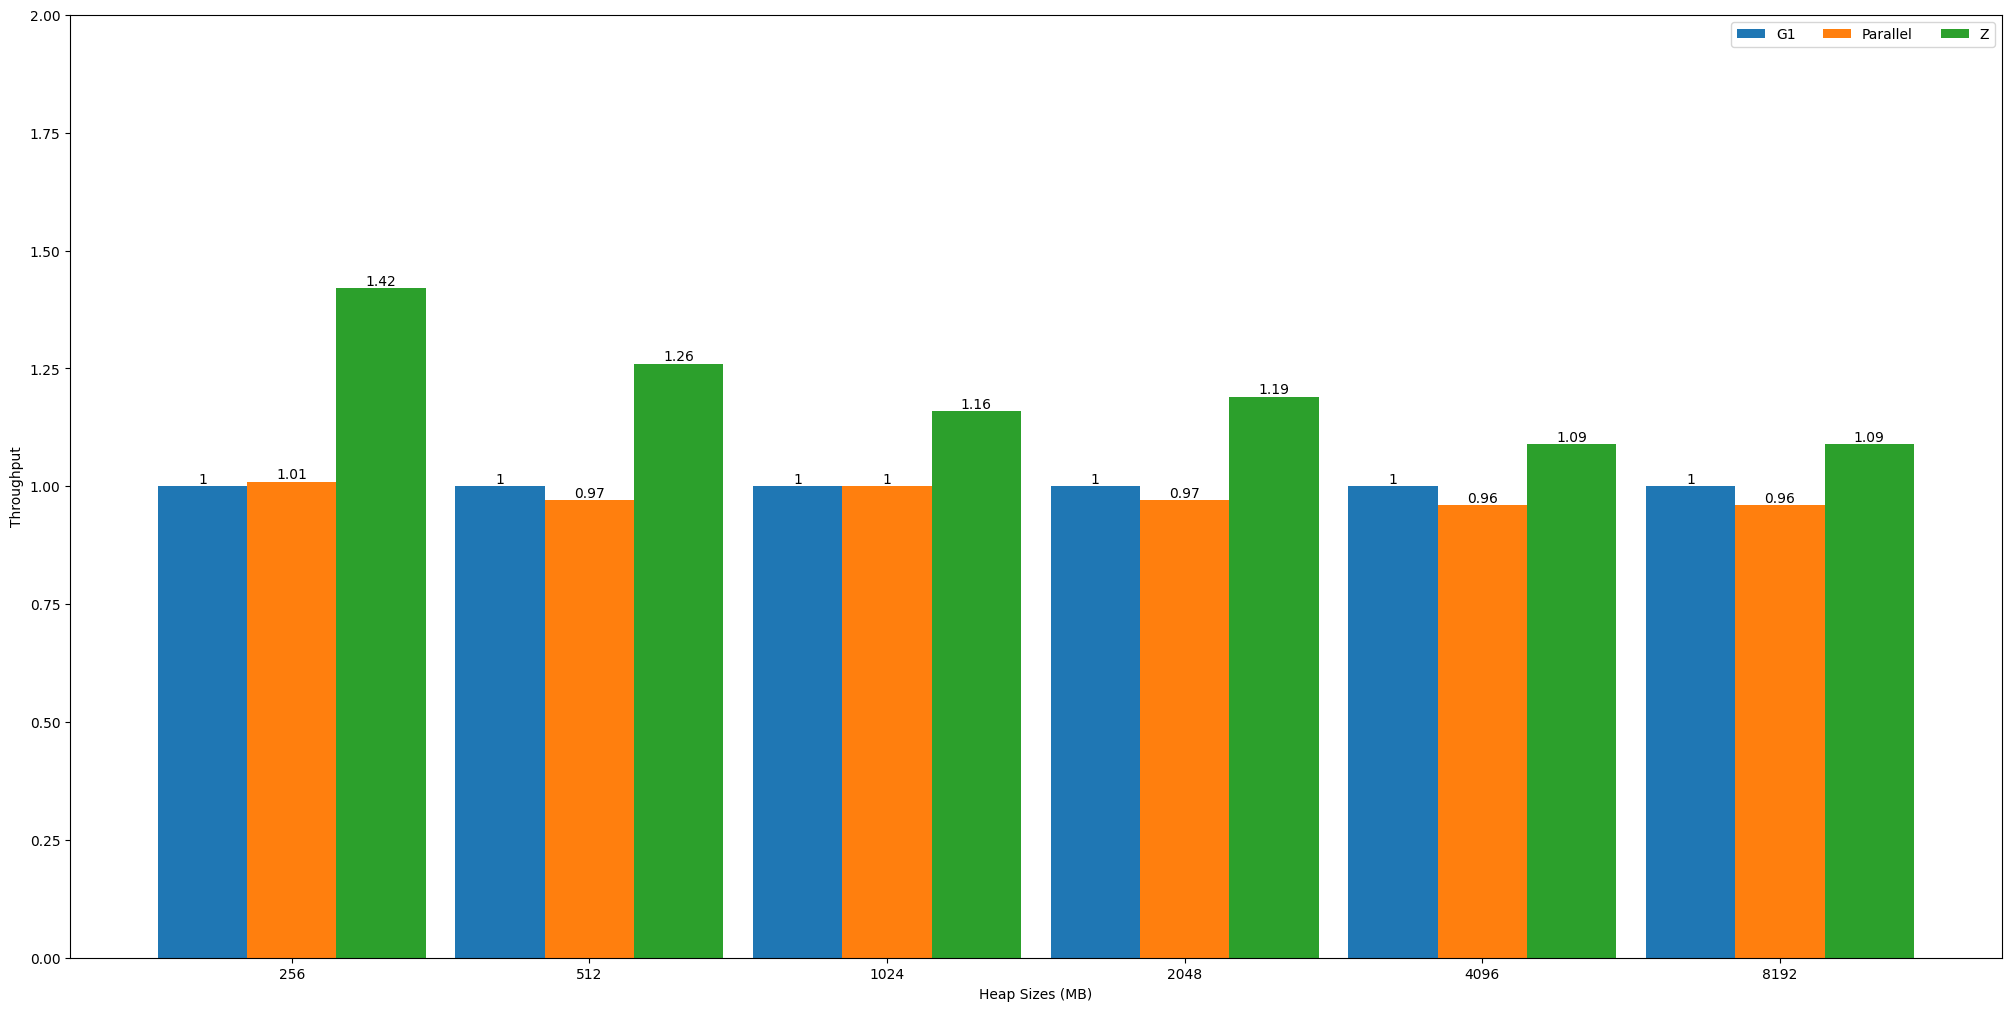

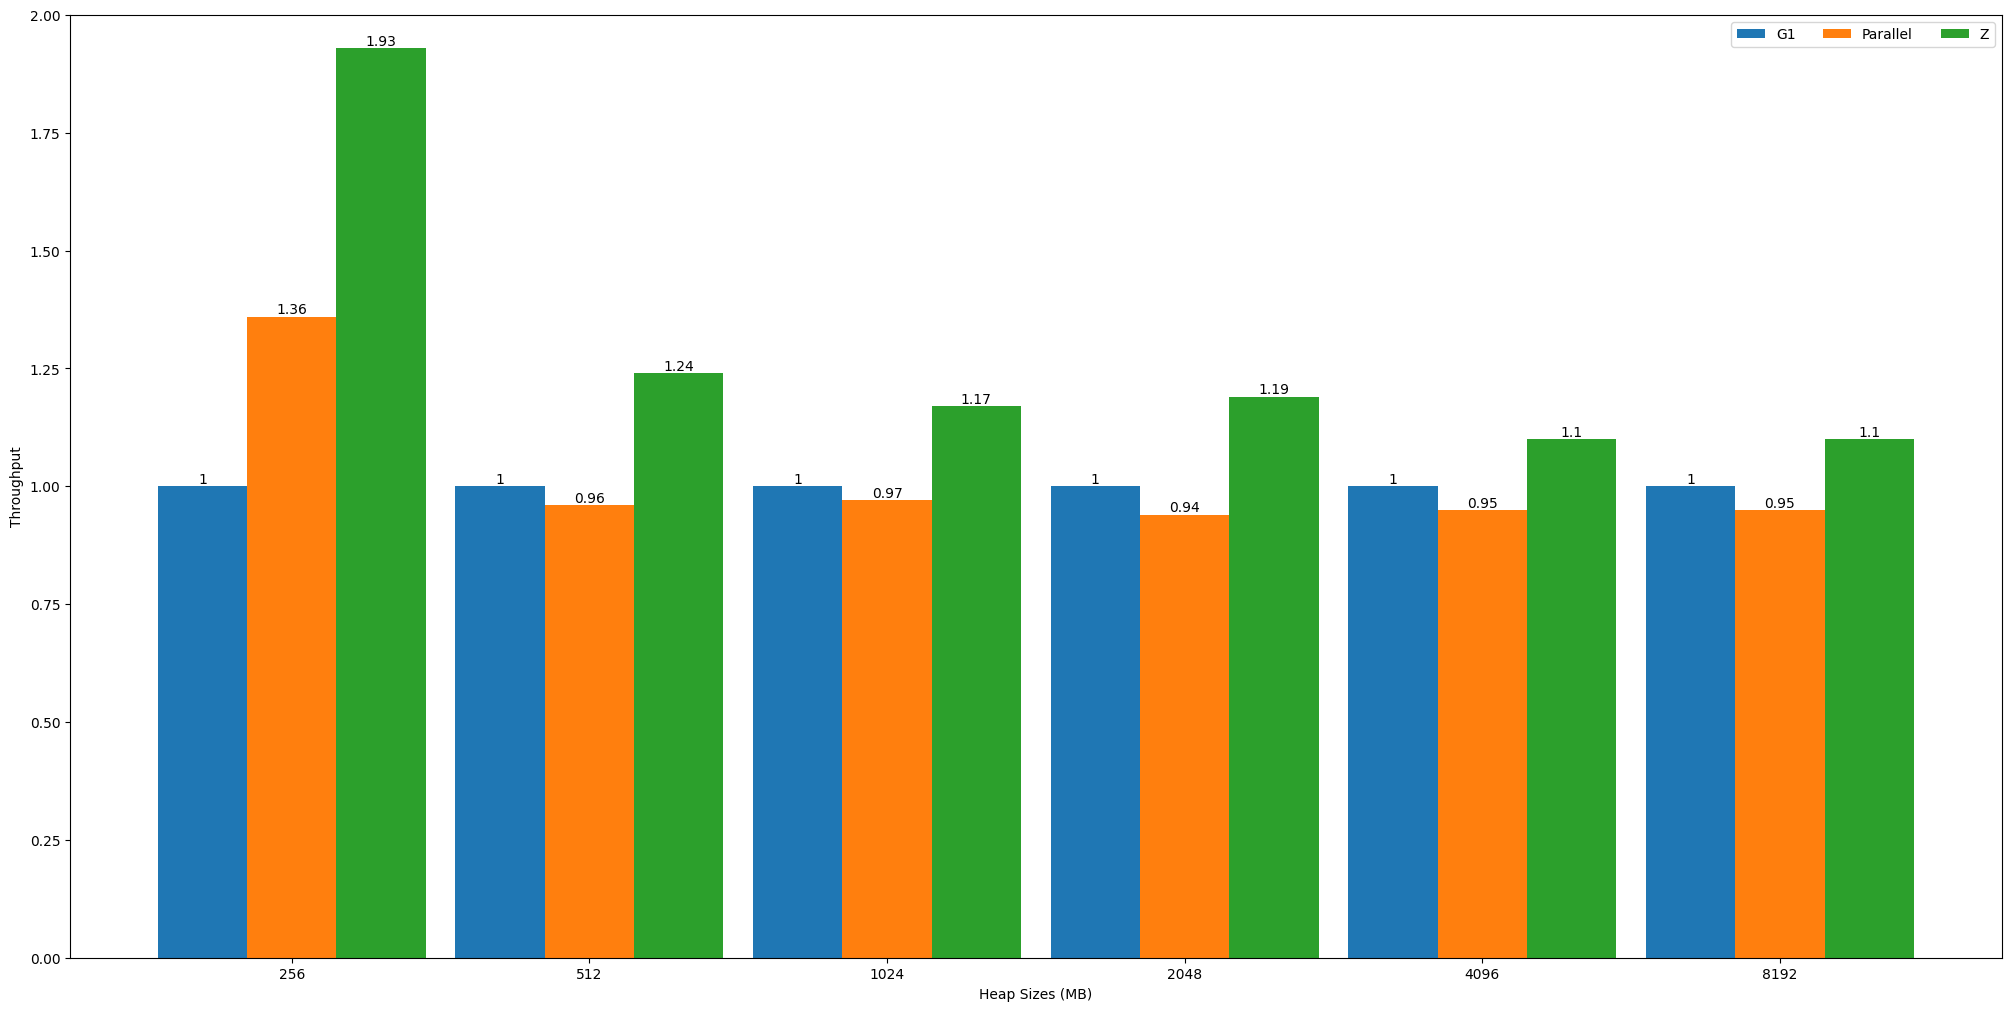

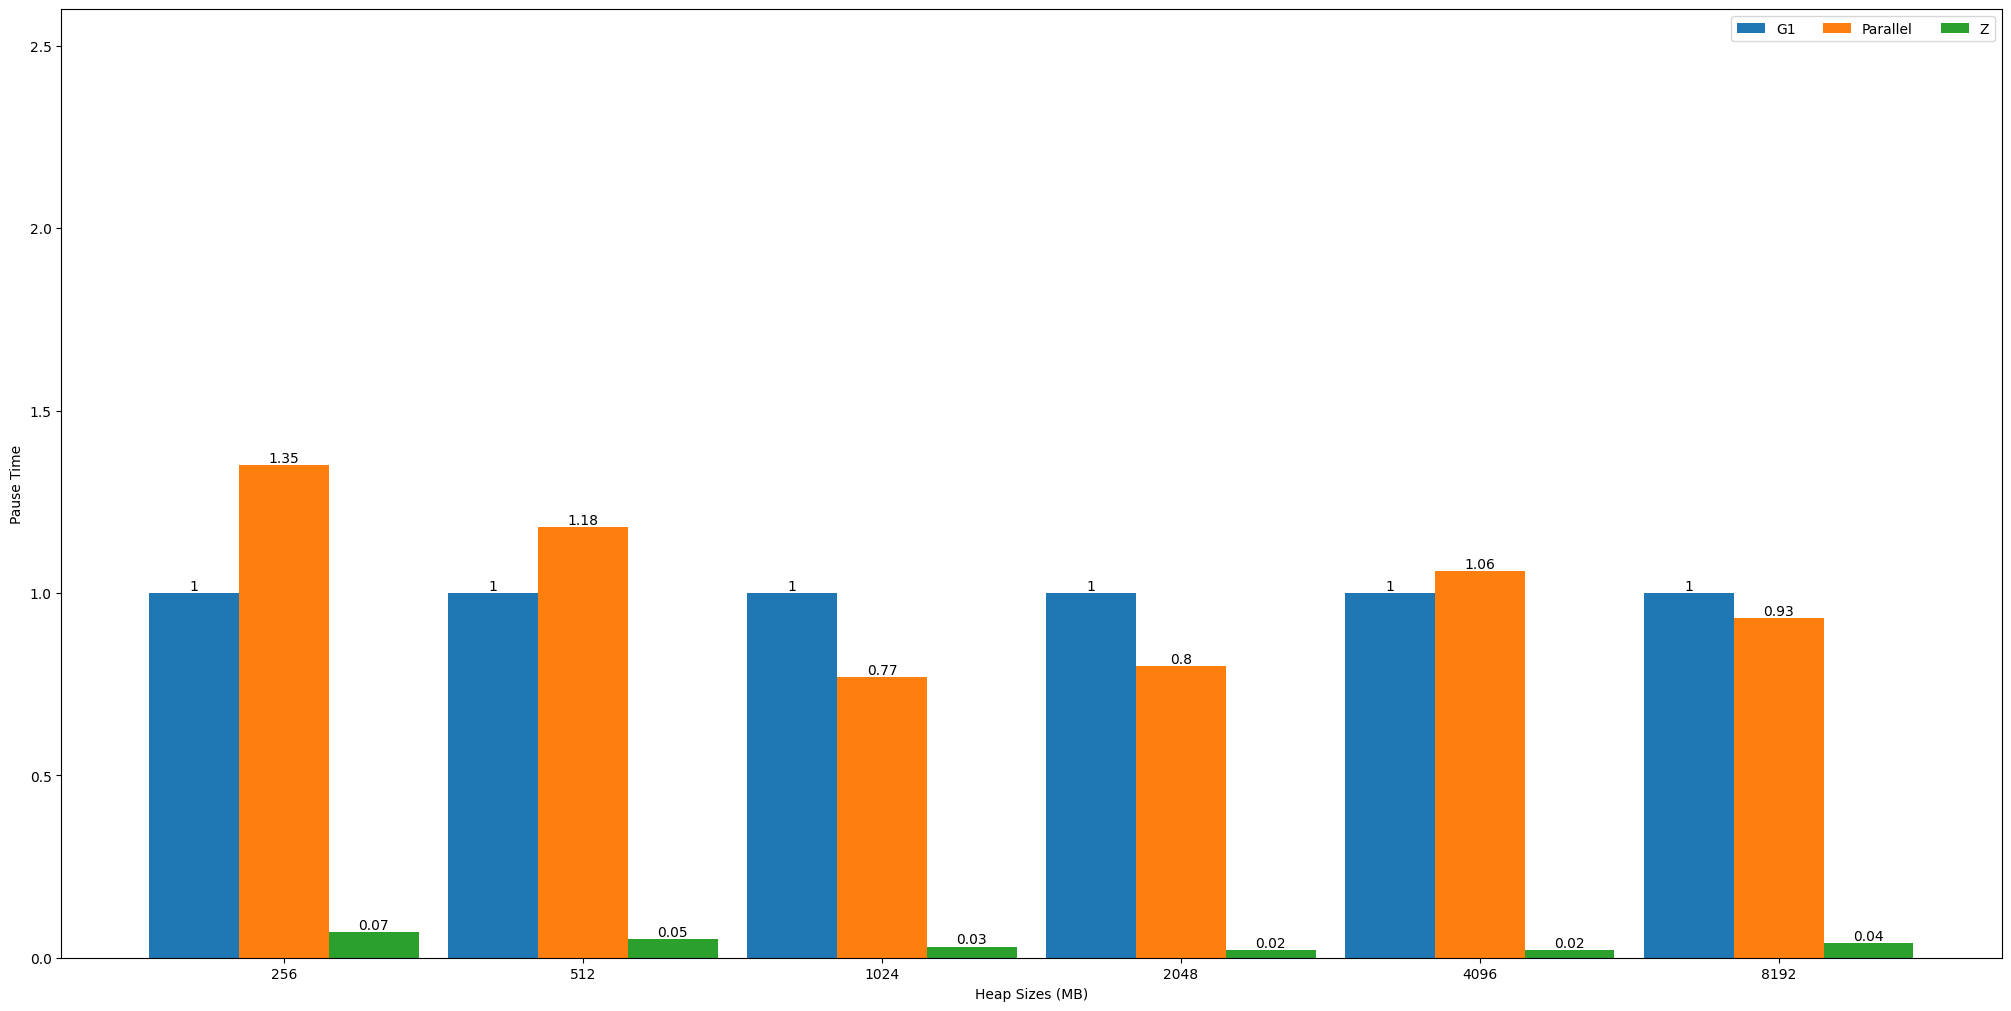

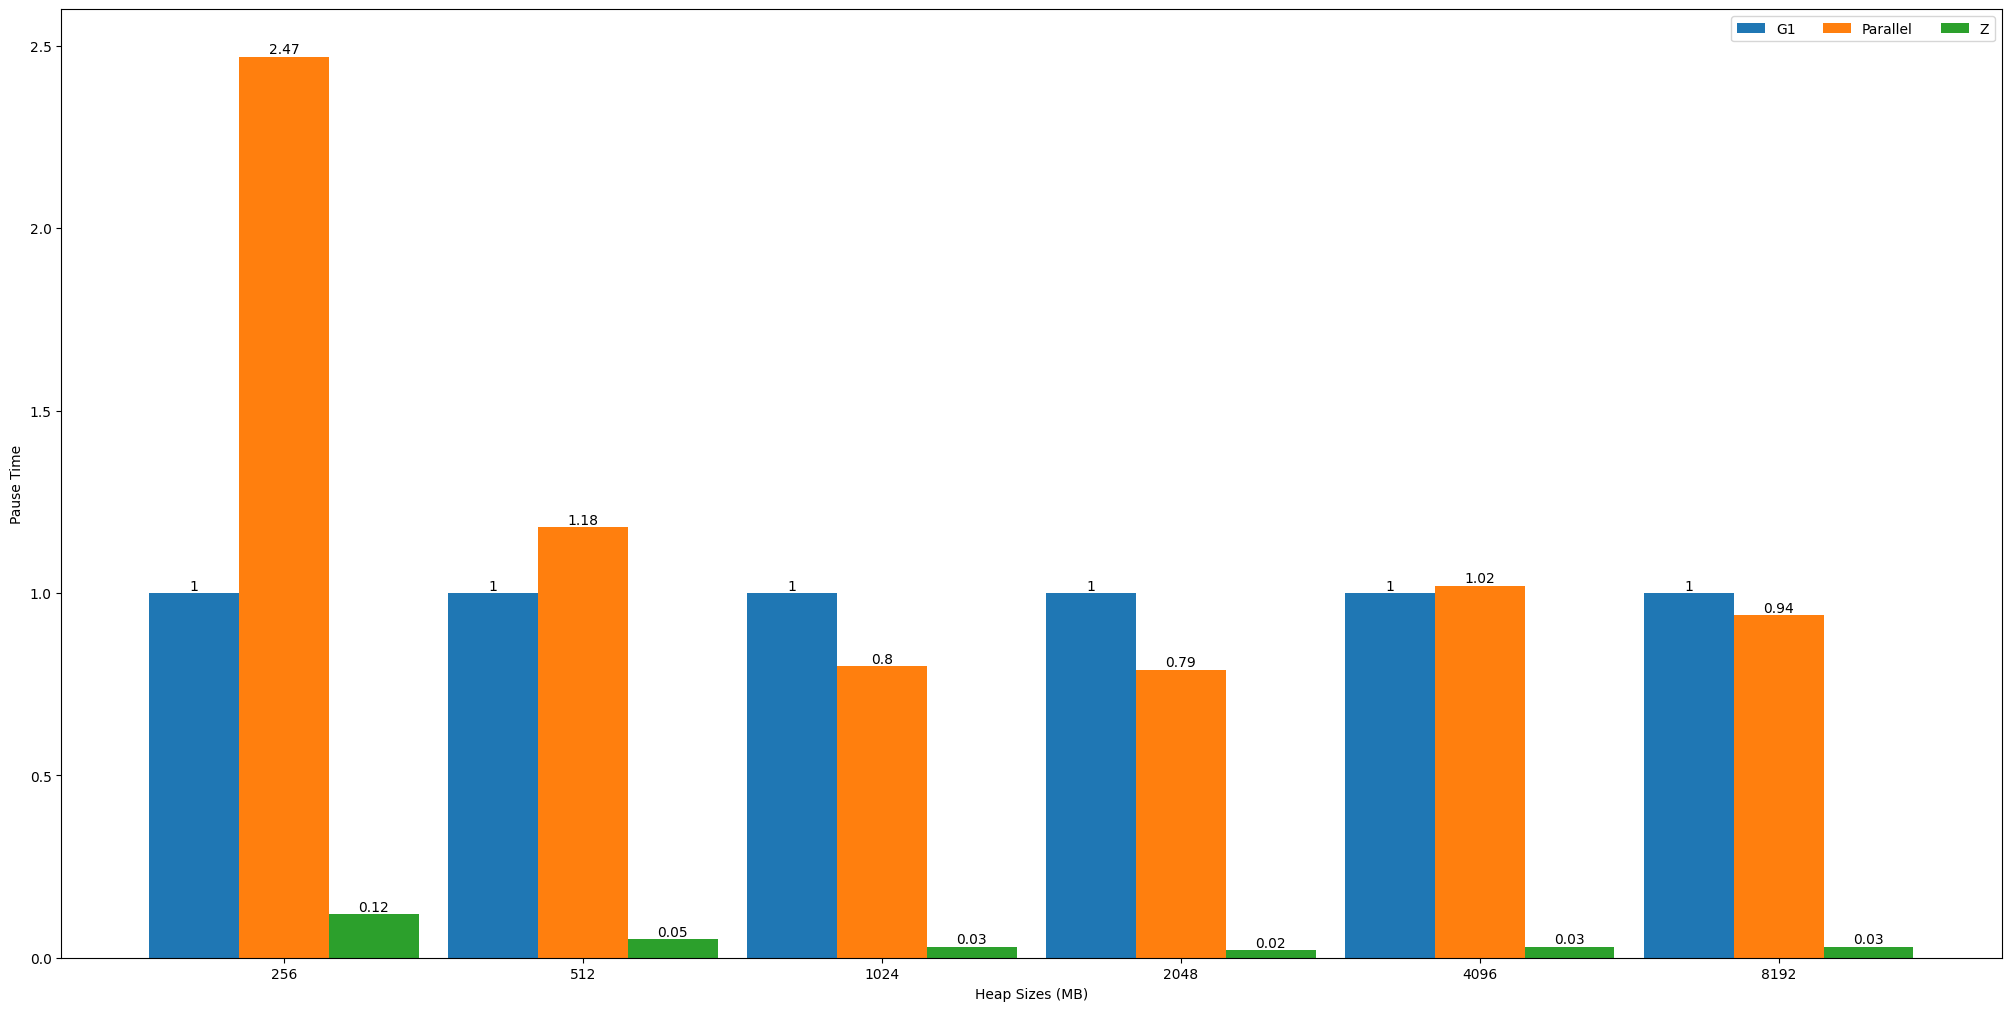

In [11]:
def plot(key, d, file_title, y_label, y_limit, layout=None):
    x_labels = list(graal.keys())
    x = np.arange(len(x_labels))
    fig, ax = plt.subplots(figsize=(20, 10), layout=layout)
    
    gcs = graal[x_labels[0]]
    #def plot_sub_graph(ax, key, d, gcs, title, y_label, y_limit):
    width = 0.3
    multiplier = 0
    for gc in gcs:
        values = [value[gc][key] for value in d.values()]
        offset = width * multiplier
        rects = ax.bar(x + offset, values, width, label=gc)
        ax.bar_label(rects)
        multiplier += 1
        ## Add some text for labels, title and custom x-axis tick labels, etc.
        ax.set_ylabel(y_label)
        ax.set_xlabel("Heap Sizes (MB)")
        #ax.set_title(title)
        ax.set_xticks(x + width, x_labels)
        ax.legend(ncols=3)
        ax.set_ylim(0, y_limit)
        fig.savefig(f"graphs/{file_title}.png")
            
plot("throughput", graal,  "throughput_graalvm", "Throughput", 2, "constrained")
plot("throughput", hotspot, "throughput_hotspot", "Throughput", 2, "constrained")
plot("pause_time", graal, "pause_time_graalvm", "Pause Time", 2.6, "constrained")
plot("pause_time", hotspot,  "pause_time_hotspot", "Pause Time",2.6, "constrained" )
